# Plotando no Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib notebook

#### 1 - Estilos predefinidos do matplotlib

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-colorblind')

#### 2 - Criando um dataframe

In [4]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


#### 3 - Plot direto no dataframe

<IPython.core.display.Javascript object>


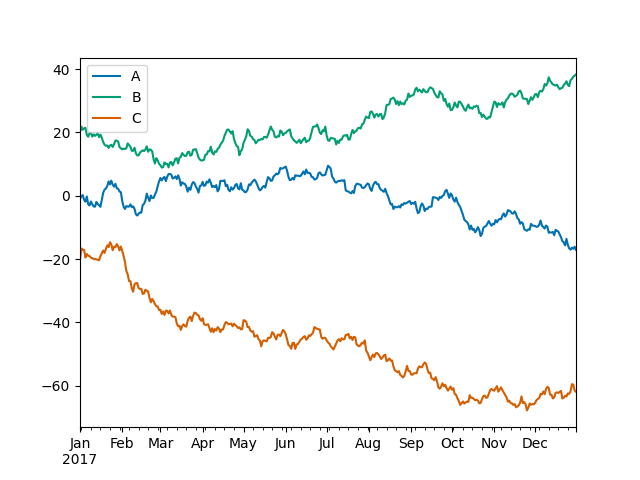

<AxesSubplot:>

In [5]:
df.plot()

#### 4 - Tipo de plotagem

<IPython.core.display.Javascript object>


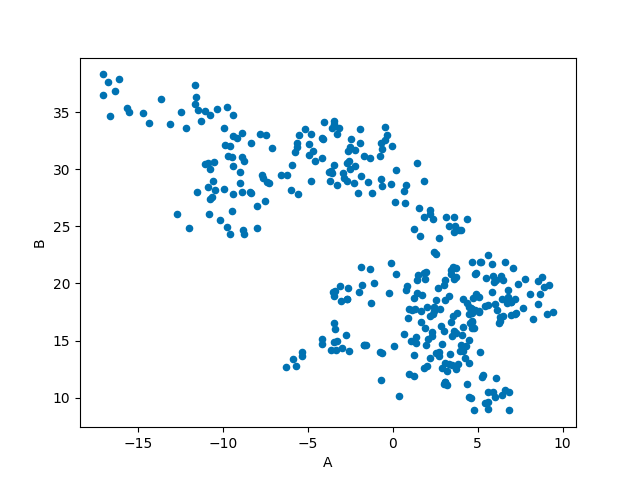

<AxesSubplot:xlabel='A', ylabel='B'>

In [6]:
df.plot('A', 'B', kind='scatter')

Você também pode escolher o tipo de plotagem usando os métodos `DataFrame.plot.kind` em vez de fornecer o argumento da palavra-chave` kind`.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

#### 5 - A contra C, com tamanho e cor conforme os valores de B

<IPython.core.display.Javascript object>


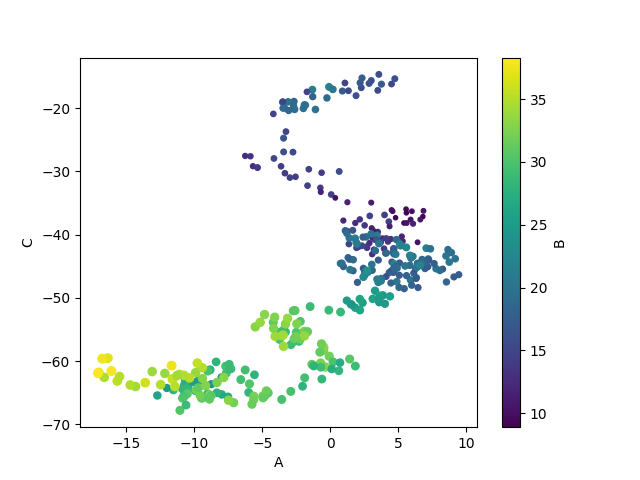

<AxesSubplot:xlabel='A', ylabel='C'>

In [7]:
df.plot.scatter?
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

#### 6 - Mudar aspecto do objeto "eixos"

<IPython.core.display.Javascript object>


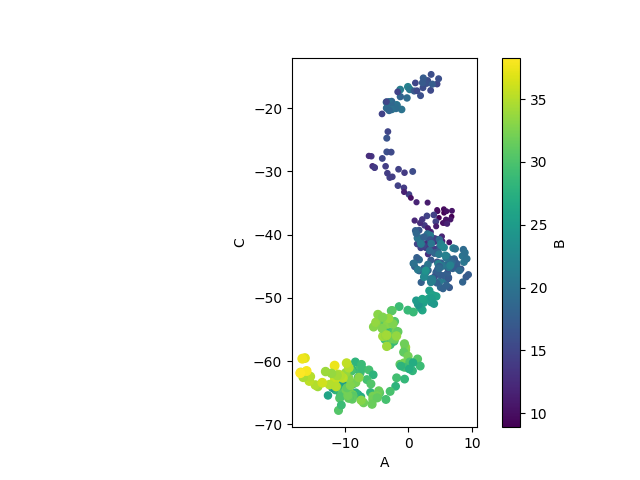

In [8]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

# Define o aspecto da escala do eixo, ou seja...
# a proporção da unidade y para a unidade x.
# 'equal' significa mesma escala de dados em ambos os eixos

ax.set_aspect('equal')

#### 7 - Plot em caixa do dataframe

<IPython.core.display.Javascript object>


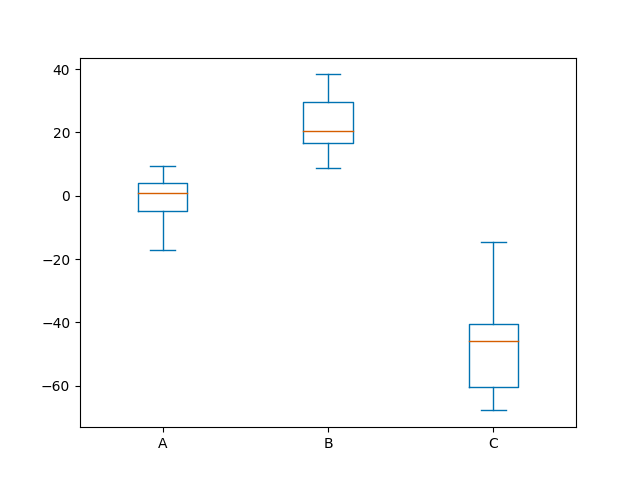

<AxesSubplot:>

In [9]:
df.plot.box()

#### 8 - Histograma do dataframe

<IPython.core.display.Javascript object>


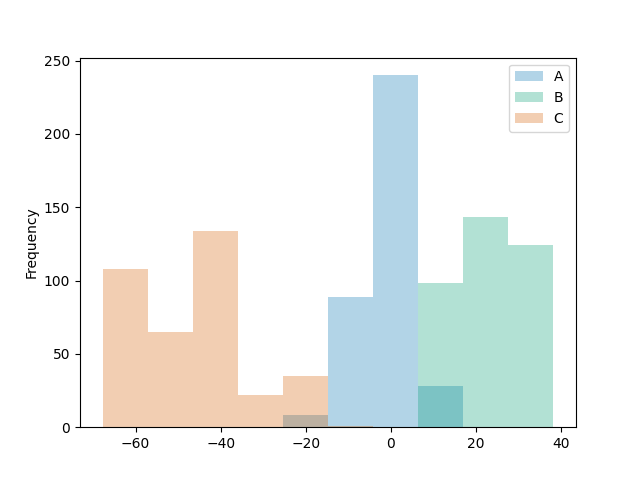

<AxesSubplot:ylabel='Frequency'>

In [10]:
df.plot.hist(alpha=0.3)

#### 9 - Gráficos de estimativa de densidade do kernel (KDE)

<IPython.core.display.Javascript object>


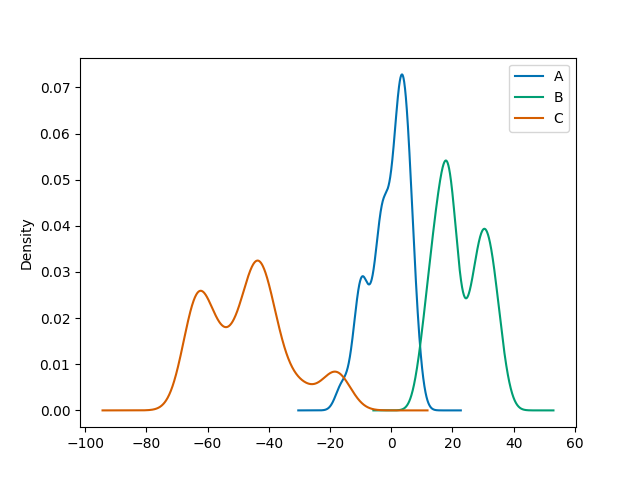

In [11]:
df.plot.kde();

#### 10 - Para produzir um gráfico de área não empilhado

<IPython.core.display.Javascript object>


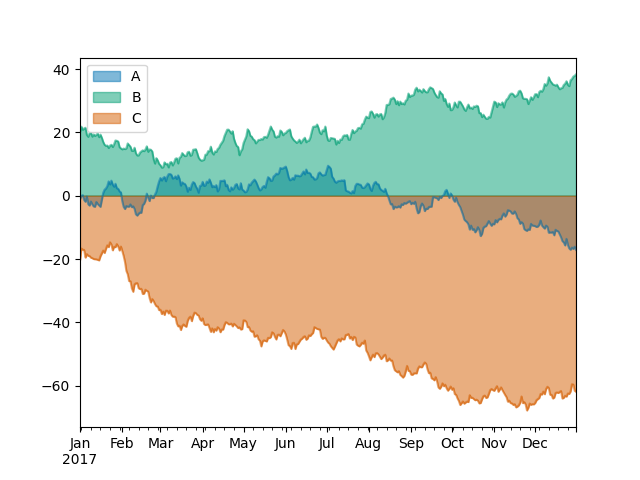

In [12]:
df.plot.area(stacked=False);

#### 11 - Carregando a base de dados Íris

In [14]:
iris = pd.read_csv('./Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 12 - Matriz de gráficos de dispersão automática

<IPython.core.display.Javascript object>


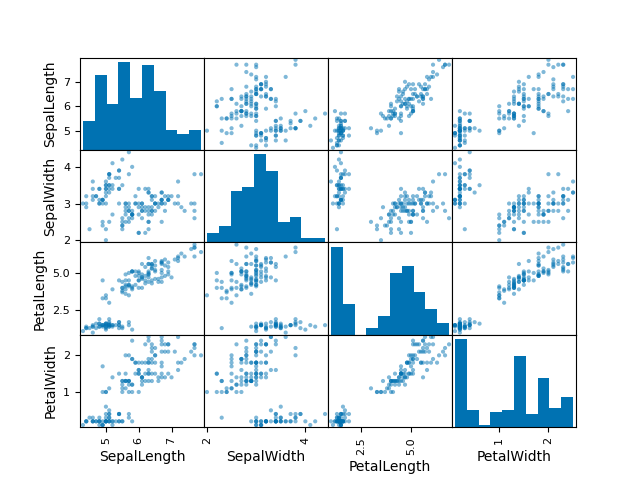

In [15]:
pd.plotting.scatter_matrix(iris);

#### 13 - Plotagem de coordenadas paralelas

In [16]:
pd.plotting?

# Seaborn

#### 14 - Importar Seaborn e criar séries pandas

In [17]:
import seaborn as sns

np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

#### 15 - Plotando histogramas

<IPython.core.display.Javascript object>


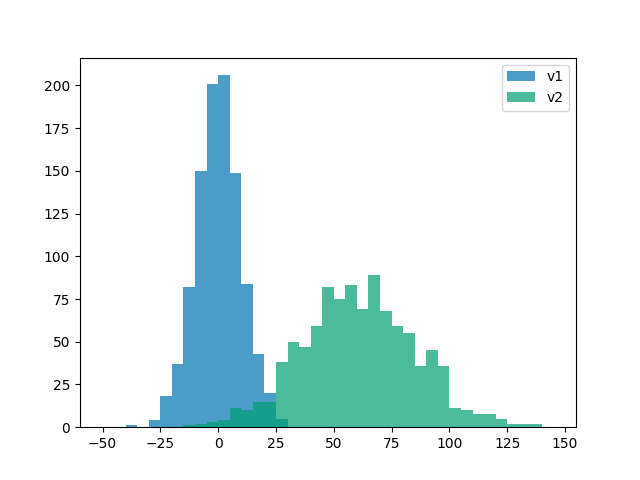

count    1000.000000
mean        0.157406
std         9.735531
min       -35.635167
25%        -6.243196
50%         0.177609
75%         6.688061
max        27.638441
Name: v1, dtype: float64

In [18]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();
v1.describe()

#### 16 - Função distplot()

<IPython.core.display.Javascript object>


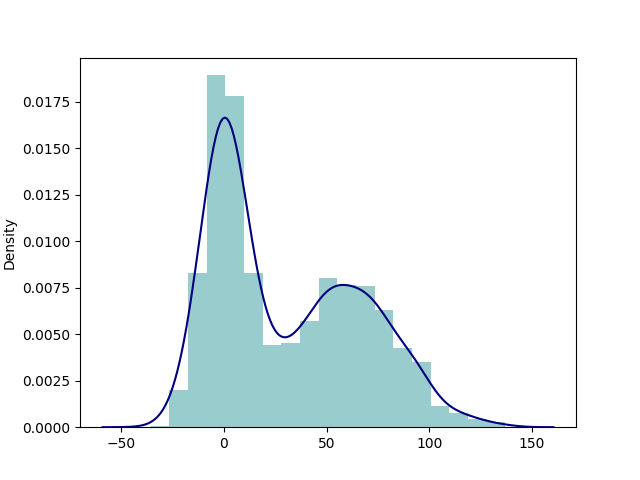

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [19]:
v3 = np.concatenate((v1,v2))
plt.figure()
sns.distplot(v3, hist_kws={'color':'Teal'}, kde_kws={'color':'Navy'});

#### 17 - Plotagem conjunta

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


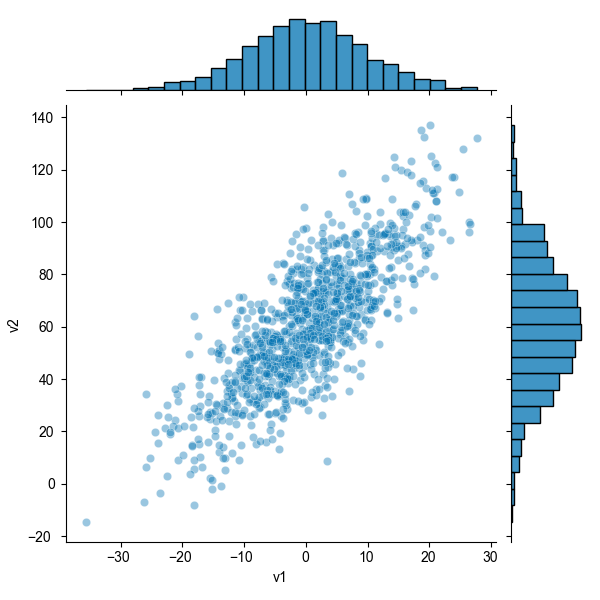

In [21]:
sns.jointplot(v1, v2, alpha=0.4);

#### 18 - Estilo de bins hexagonal

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


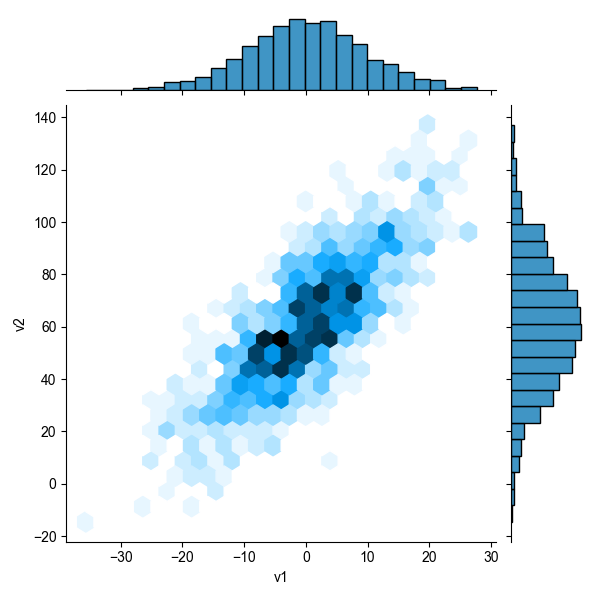

In [22]:
sns.jointplot(v1,v2,kind='hex')

#### 19 - Estimativas de densidade do kernel com mudança de estilo seaborn

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


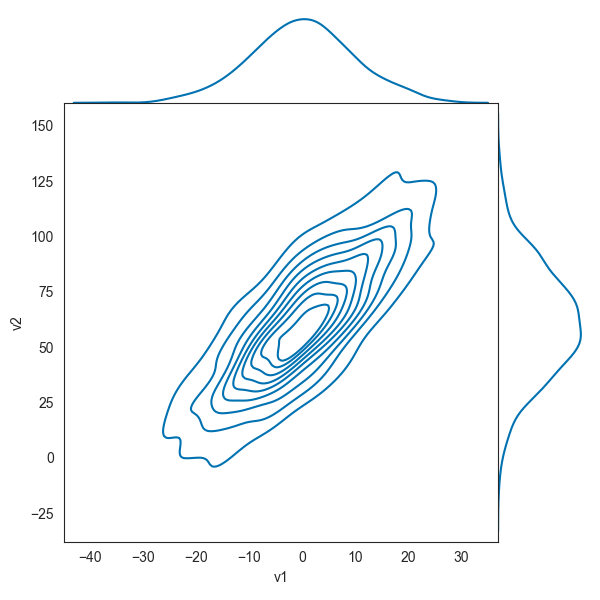

In [23]:
sns.set_style('white')

sns.jointplot(v1,v2, kind='kde', space=0);

#### 20 - Matriz de dispersão do seaborn

<IPython.core.display.Javascript object>


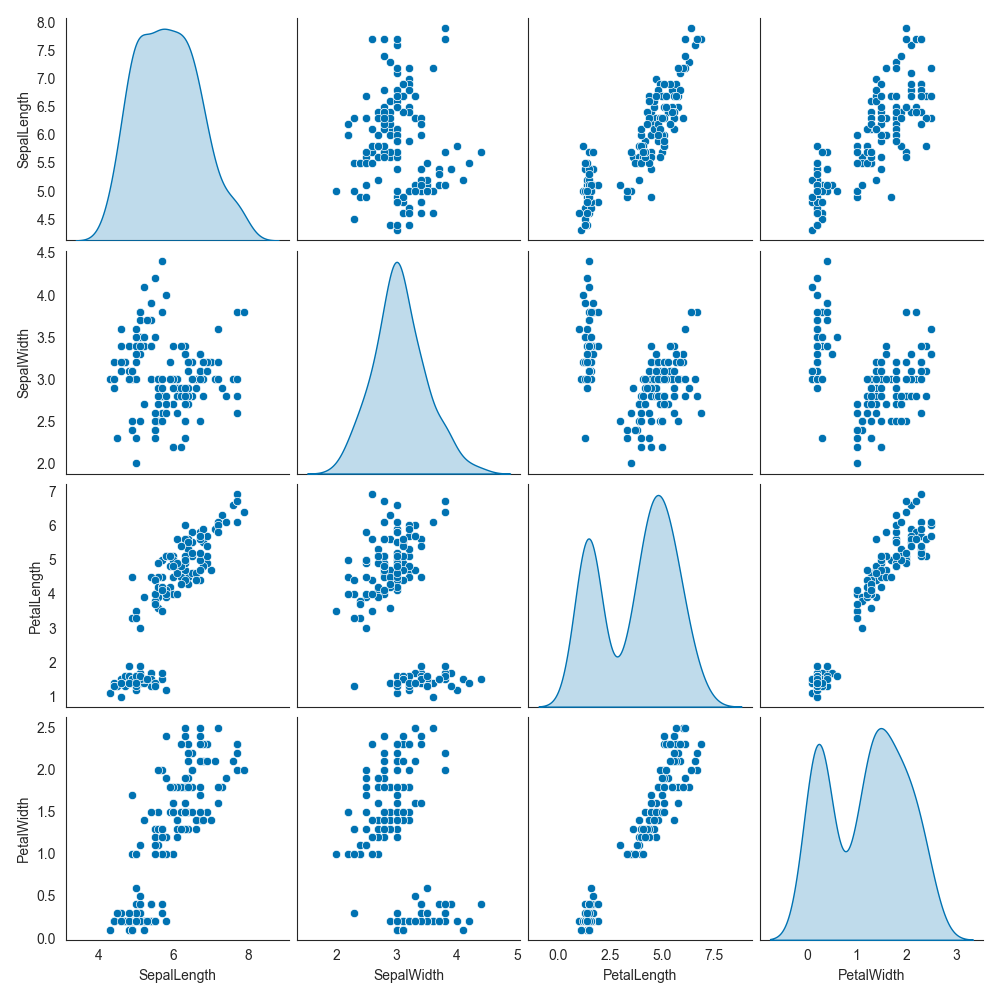

In [25]:
sns.pairplot(iris, diag_kind='kde')

#### 21 - Plotagem swarm e de violino

<IPython.core.display.Javascript object>


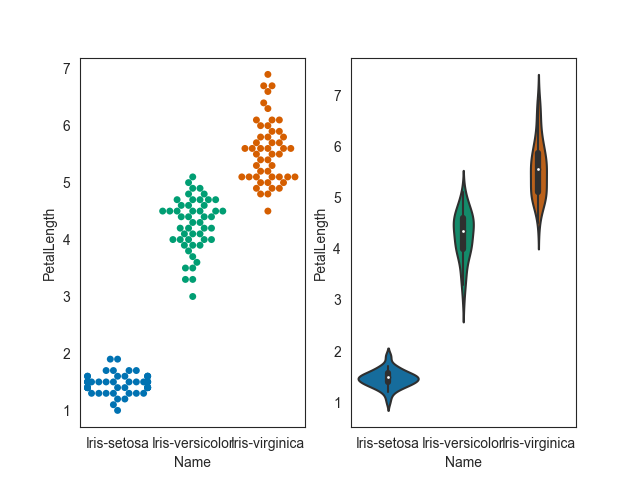

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

In [27]:
plt.figure()
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);

# Exercícios de consultas no Pandas

#### 22 - Carregando dataframe de medalhas nas olimpíadas

In [29]:
import pandas as pd

df = pd.read_csv('./Data/olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


#### 23 - Escreva uma função que crie uma série chamada "Points", ela deve conter o valor ponderado onde cada medalha de ouro conta 3 pontos, medalhas de prata conta 2 pontos e medalhas de bronze conta 1 ponto. A função deve retornar apenas um objeto Série, com os nomes dos países como índices. Esta função deve retornar uma série de comprimento 146.

In [30]:
def points():
    
    return (3*df['Gold.2'] + 2*df['Silver.2'] + df['Bronze.2']).sort_values(ascending=False)

points().loc['Brazil']

184

#### 24 - Carregando dataframe do censo dos EUA

In [32]:
census_df = pd.read_csv('./Data/census.csv')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


#### 25 - Podemos verificar que os Estados Unidos são divididos em quatro regiões. Criar uma consulta que encontre os municípios pertencentes às regiões 1 ou 2, cujo nome começa com 'Washington' e cujo população estimada foi maior em 2015 que em 2014. Essa função deve retornar um DataFrame 5x2 com as colunas = ['STNAME', 'CTYNAME'] e o mesmo índice que o dataframe original (classificado em ordem crescente por índice).

In [33]:
def function():
    return census_df.loc[(census_df['SUMLEV'] == 50) & (census_df['REGION'] <= 2) & (census_df['CTYNAME'].str.startswith('Washington')) & (census_df['POPESTIMATE2015'] > census_df['POPESTIMATE2014']), ('STNAME', 'CTYNAME')]

function()

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


#### 26 - Qual estado tem mais municípios (condados)?

In [34]:
def max_counties():
    return census_df['STNAME'].value_counts().idxmax()
    #return census_df[census_df['SUMLEV'] == 50].groupby(['STNAME']).size().idxmax()
max_counties()

'Texas'